In [1]:
# todo 完整教程：https://www.tensorflow.org/tutorials/text/word_embeddings
import pandas as pd
from tensorflow import keras
import tensorflow as tf


In [12]:
embadding_layer=keras.layers.Embedding(10,4)
result=embadding_layer(tf.constant([1,2,3]))
result.numpy()

array([[-0.00815906, -0.04227349,  0.02976818, -0.02220124],
       [ 0.00376485, -0.03748614, -0.02586775,  0.03329519],
       [ 0.02940312,  0.02517606, -0.01486777, -0.04968197]],
      dtype=float32)

In [65]:
# tf.constant[1,2,3]

In [7]:
import tensorflow_datasets as tfds

In [66]:
from tensorflow.keras.datasets import imdb

In [70]:
train=imdb.load_data(num_words=10)

In [71]:
data

((array([list([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 9, 2, 2, 2, 5, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 6, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 8, 2, 8, 2, 5, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 8, 4, 2, 2, 2, 2, 2, 4, 2, 7, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
         list([1, 2, 2, 2, 2, 2, 2, 5, 6, 2, 2, 2, 2, 2, 4, 2, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 8, 2, 2, 7, 4, 2, 2, 2, 4, 2, 9, 2, 2, 5, 2, 4, 2, 9, 2, 2, 4, 2, 9, 2, 2, 4, 2, 9, 4, 2, 2, 2, 4, 2, 5, 2, 2, 2, 2, 2, 4, 2, 9, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 5, 2, 2, 2, 2, 4, 2, 9, 2, 2, 7, 2, 2, 2, 2, 2, 2,

In [8]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k', 
    split = (tfds.Split.TRAIN, tfds.Split.TEST), 
    with_info=True, as_supervised=True,download=False)

<PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>

In [14]:
encoder = info.features['text'].encoder
encoder.subwords[-1:-20:-1]

['..."',
 '?).',
 'Especially_',
 'Freeman',
 'Get_',
 'Gho',
 'Jus',
 'Lei',
 'Patrick_',
 'Perso',
 'Phill',
 'SU',
 'Serious',
 'Someone',
 'Still_',
 'Thom',
 'accompan',
 'accurate_',
 'adventures']

In [19]:
train_batches=train_data.shuffle(100).padded_batch(10)
test_batches=test_data.shuffle(100).padded_batch(10)

In [20]:
train_batch, train_labels = next(iter(train_batches))
train_batch.numpy()

array([[3984,    2, 5895, ...,  143,  603, 3478],
       [  12,   56,  491, ...,    0,    0,    0],
       [  12,  580,    1, ...,    0,    0,    0],
       ...,
       [8002, 7968,  123, ...,    0,    0,    0],
       [ 249, 5997,  713, ...,    0,    0,    0],
       [  14,    9,   45, ...,    0,    0,    0]], dtype=int64)

In [23]:
import tensorflow.keras as keras
from tensorflow.keras import layers
embedding_dim=16

model = keras.Sequential([
  layers.Embedding(encoder.vocab_size, embedding_dim),
  layers.GlobalAveragePooling1D(),
  layers.Dense(16, activation='relu'),
  layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 131,249
Trainable params: 131,249
Non-trainable params: 0
_________________________________________________________________


In [25]:
import tensorflow as tf
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    train_batches,
    epochs=10,
    validation_data=test_batches, validation_steps=20)

Epoch 1/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.5094 - accuracy: 0.6921 - val_loss: 0.3993 - val_accuracy: 0.8350
Epoch 2/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.2862 - accuracy: 0.8830 - val_loss: 0.4142 - val_accuracy: 0.8300
Epoch 3/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.2306 - accuracy: 0.9098 - val_loss: 0.3615 - val_accuracy: 0.8550
Epoch 4/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.1999 - accuracy: 0.9240 - val_loss: 0.4881 - val_accuracy: 0.8400
Epoch 5/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.1768 - accuracy: 0.9328 - val_loss: 0.4630 - val_accuracy: 0.8450
Epoch 6/10
2500/2500 [==============================] - 6s 2ms/step - loss: 0.1585 - accuracy: 0.9424 - val_loss: 0.4721 - val_accuracy: 0.8400
Epoch 7/10
2500/2500 [==============================] - 6s 2ms/step - loss: 0.1470 - accuracy: 0.9462 - val_loss: 0.5521 - val_accuracy:

In [32]:
import matplotlib.pyplot as plt
histiry_dict= history.history

In [33]:
val_acc=histiry_dict['val_accuracy']
acc=histiry_dict['accuracy']
loss=histiry_dict['loss']
val_loss=histiry_dict['val_loss']

In [34]:
val_acc,acc

([0.8349999785423279,
  0.8299999833106995,
  0.8550000190734863,
  0.8399999737739563,
  0.8450000286102295,
  0.8399999737739563,
  0.8450000286102295,
  0.8600000143051147,
  0.8550000190734863,
  0.8399999737739563],
 [0.6921200156211853,
  0.8829600214958191,
  0.9097599983215332,
  0.9240000247955322,
  0.9327600002288818,
  0.942359983921051,
  0.9462400078773499,
  0.9521600008010864,
  0.9575999975204468,
  0.9606000185012817])

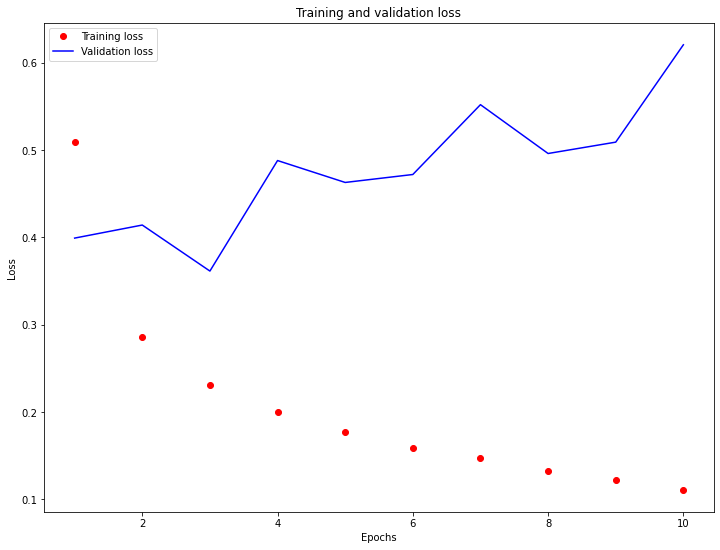

In [49]:
epochs=range(1,len(acc)+1)
plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [41]:
?plt.plot

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,

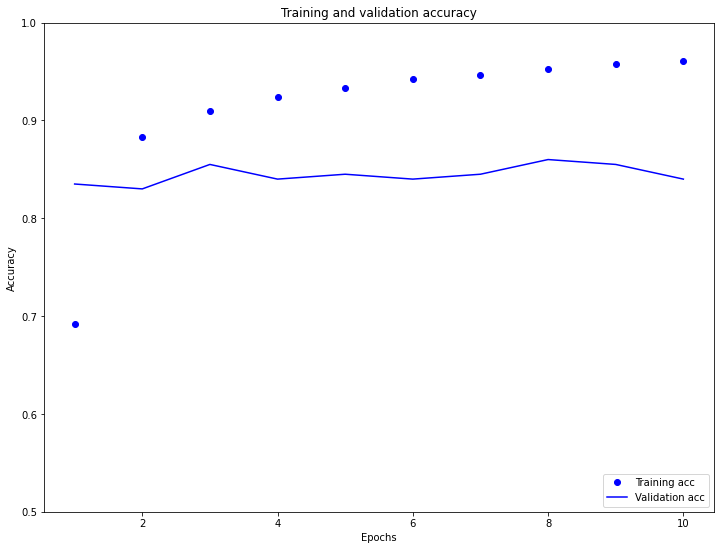

In [58]:
plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [60]:
e=model.layers[0]
weights=e.get_weights()[0]
weights

array([[ 0.06014609,  0.01304256,  0.00951503, ...,  0.00179579,
         0.00048933,  0.05173272],
       [-0.01193988,  0.07363875, -0.03071804, ..., -0.11429879,
        -0.01990427,  0.16401446],
       [ 0.04678687,  0.0657969 , -0.03381545, ..., -0.10376129,
         0.02911953,  0.0696877 ],
       ...,
       [ 0.02287895,  0.01730447,  0.02730615, ...,  0.03898045,
         0.04152942, -0.03628024],
       [ 0.01341804,  0.02270658, -0.0100353 , ..., -0.0283753 ,
        -0.02448876,  0.00601519],
       [-0.00471431,  0.02487344, -0.01346177, ..., -0.04550079,
        -0.04777038,  0.04109221]], dtype=float32)

In [61]:
import io

encoder = info.features['text'].encoder

out_v = io.open('../dataset/vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('../dataset/meta.tsv', 'w', encoding='utf-8')

for num, word in enumerate(encoder.subwords):
  vec = weights[num+1] # skip 0, it's padding.
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
out_v.close()
out_m.close()

In [62]:
%load_ext tensorboard

In [63]:
%tensorboard --logdir dataset/autograph/

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 24004.